downloading date from start date: 2024-01-08 13:06:07.690203
downloading date from end date: 2024-03-08 13:06:07.690203
[*********************100%%**********************]  1 of 1 completed
(1048, 6)
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


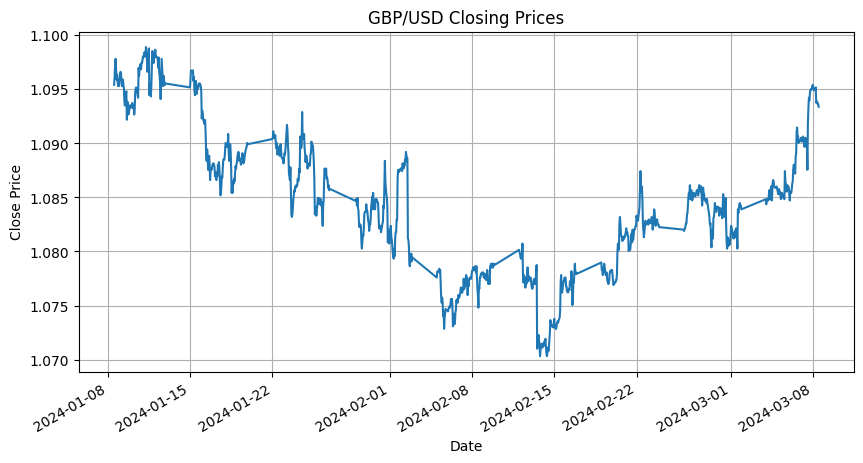

In [145]:
import yfinance as yf
from datetime import datetime, timedelta


forex_symbols = ['EURUSD=X', 'GBPUSD=X', 'USDJPY=X', 'USDCHF=X', 'AUDUSD=X', 'USDCAD=X']
intervals =  ['1m', '2m', '5m', '1h', '1d']

# set the symbool and interval size
ticker = forex_symbols[0]
inter = intervals[3]


# set the time interval parameters
m_days_back_from_start =60


# ---|start_date| -----------|end date|------


end_date = datetime.now()-timedelta(days=3)
start_date = end_date - timedelta(days=m_days_back_from_start)


print(f'downloading date from start date: {start_date}')
print(f'downloading date from end date: {end_date}')



forex_data = yf.download(ticker, start=start_date, end=end_date, interval= inter)

print(forex_data.shape)
print(forex_data.columns)



import matplotlib.pyplot as plt

forex_data['Close'].plot(figsize=(10,5))
plt.title('GBP/USD Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()


In [146]:
import pandas as pd
import numpy as np



df = pd.DataFrame(forex_data)




# Calculate additional features
df['Daily Return'] = df['Close'].pct_change()  # Daily Return
df['High-Low Range'] = df['High'] - df['Low']  # Daily Range
df['Close-Open Change'] = df['Close'] - df['Open']  # Day's Change
df['Relative High'] = (df['High'] - df['Open']) / df['Open']
df['Relative Low'] = (df['Low'] - df['Open']) / df['Open']
# df['Volume Change'] = df['Volume'].pct_change()  # Volume Change


window_size = 5  # Example window size


df['Moving Average'] = df['Close'].rolling(window=window_size, min_periods=1).mean()
df['Volatility'] = df['Close'].rolling(window=window_size, min_periods=1).std(ddof=0)
# df['Volume MA'] = df['Volume'].rolling(window=window_size, min_periods=1).mean()
df['Log Returns'] = np.log(df['Close'] / df['Close'].shift(1))

df.bfill( inplace=True)
df.fillna(0, inplace=True)

df = df.reset_index()
df['date'] = df['Datetime'].dt.strftime('%Y-%m-%d %H:%M:%S')
df.drop('Datetime', axis=1, inplace=True)

# dropping volume based indicator
df.drop('Volume', axis=1, inplace=True)


cols = list(df.columns)

cols.insert(-1, cols.pop(cols.index('Close')))
cols.insert(0, cols.pop(cols.index('date')))



df = df[cols]

df


,date,Open,High,Low,Adj Close,Daily Return,High-Low Range,Close-Open Change,Relative High,Relative Low,Moving Average,Volatility,Log Returns,Close
0,2024-01-08 13:00:00,1.094931,1.095890,1.094691,1.095410,0.000658,0.001200,0.000480,0.000877,-0.000219,1.095410,0.000000,0.000658,1.095410
1,2024-01-08 14:00:00,1.095410,1.096491,1.095290,1.096131,0.000658,0.001201,0.000721,0.000987,-0.000109,1.095770,0.000360,0.000658,1.096131
2,2024-01-08 15:00:00,1.096371,1.097695,1.095890,1.097213,0.000987,0.001804,0.000842,0.001208,-0.000438,1.096251,0.000741,0.000987,1.097213
3,2024-01-08 16:00:00,1.097333,1.098177,1.097213,1.097815,0.000549,0.000964,0.000482,0.000769,-0.000110,1.096642,0.000933,0.000549,1.097815
4,2024-01-08 17:00:00,1.097815,1.098177,1.096611,1.096732,-0.000987,0.001566,-0.001084,0.000329,-0.001097,1.096660,0.000835,-0.000988,1.096732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,2024-03-08 08:00:00,1.093613,1.094092,1.093374,1.093853,0.000109,0.000718,0.000239,0.000438,-0.000219,1.094523,0.000604,0.000109,1.093853
1044,2024-03-08 09:00:00,1.093853,1.093972,1.093016,1.093853,0.000000,0.000957,0.000000,0.000109,-0.000765,1.094308,0.000613,0.000000,1.093853
1045,2024-03-08 10:00:00,1.093613,1.093972,1.093016,1.093613,-0.000219,0.000957,0.000000,0.000328,-0.000546,1.094044,0.000570,-0.000219,1.093613
1046,2024-03-08 11:00:00,1.093613,1.094212,1.093255,1.093613,0.000000,0.000957,0.000000,0.000547,-0.000328,1.093733,0.000107,0.000000,1.093613


In [147]:

signal_multi = [df, df[['date','Close']]]


# set file name here from the above defined list
option = signal_multi[0]
file_name = f'tr_{ticker}_{inter}_{len(list(option.columns))}.csv'
file_name_test = f'te_{ticker}_{inter}_{len(list(option.columns))}.csv'
file_name_val = f'val_{ticker}_{inter}_{len(list(option.columns))}.csv'

df_test = option[-36:]
df_val = option[-72:-36]
option.iloc[:-72]

print(f'training file saving as {file_name} ') 
print(f'testing file saving as {file_name_test}') 
print(f'validation file saving as {file_name_val}') 




def save_df_to_csv(option, file_name):
    option.to_csv(file_name, index=False) 

training file saving as tr_EURUSD=X_1h_14.csv 
testing file saving as te_EURUSD=X_1h_14.csv
validation file saving as val_EURUSD=X_1h_14.csv


In [148]:

save_df_to_csv(option, file_name)
save_df_to_csv(df_test, file_name_test)
save_df_to_csv(df_val, file_name_val)
